In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix


plt.style.use('fivethirtyeight')

In [2]:
## Loading the data

ROOT_DIR = 'MNIST'

train_data = datasets.MNIST(
    root = ROOT_DIR,
    train = True,
    transform = transforms.ToTensor(),
    target_transform = None,
    download = True   

)

test_data = datasets.MNIST(
    root = ROOT_DIR,
    train = False,
    transform = transforms.ToTensor(),
    target_transform = None,
    download = True   

)

1.5%

100.0%


Extracting MNIST\MNIST\raw\train-images-idx3-ubyte.gz to MNIST\MNIST\raw


102.8%


Extracting MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\MNIST\raw




100.0%
22.5%

Extracting MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\MNIST\raw



112.7%


Extracting MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\MNIST\raw



In [6]:
train_data.data.dtype

torch.uint8

In [9]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

<AxesSubplot:>

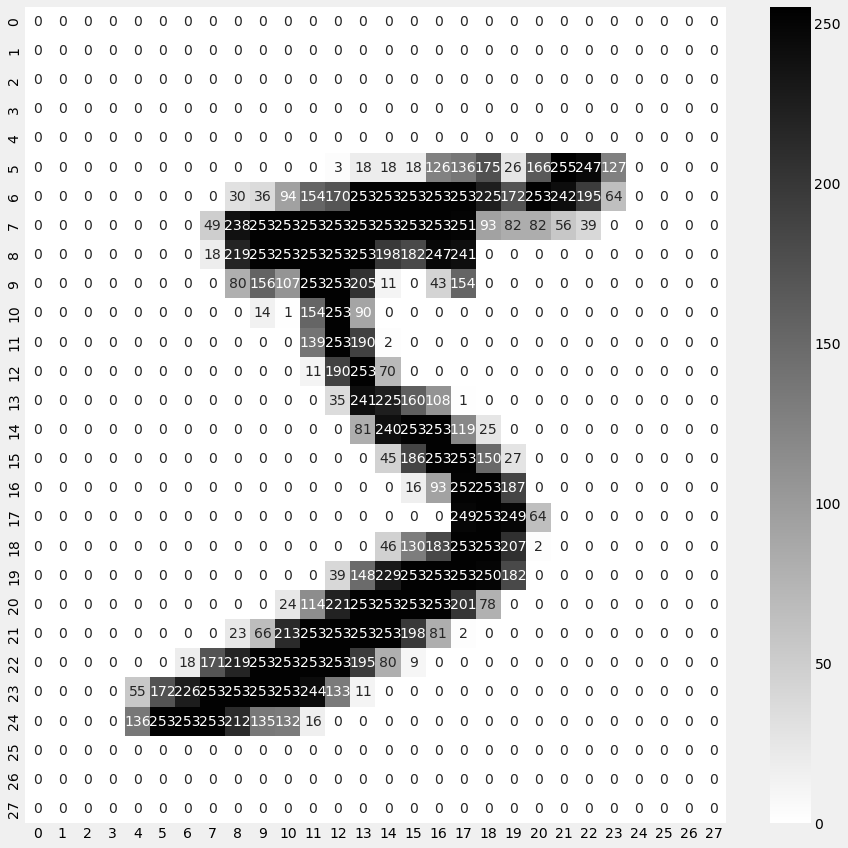

In [20]:
plt.figure(figsize=(14,14))
sns.heatmap(train_data.data[0], annot=True,cmap="binary", fmt='d')

In [21]:
train_data.data[0].shape

torch.Size([28, 28])

In [25]:
train_data.data[0].min().numpy(), train_data.data[0].max().numpy()

(array(0, dtype=uint8), array(255, dtype=uint8))

In [7]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [8]:
train_data.targets.dtype

torch.int64

In [22]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [23]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [27]:
BATCH=128

train_data_loader = DataLoader(dataset=train_data,
                              batch_size=BATCH,
                              shuffle=True)

test_data_loader = DataLoader(dataset=test_data,
                             batch_size=BATCH)

In [28]:
for x in test_data_loader:
    print(x[0].shape)
    print(x[1].shape)    
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [30]:
DEVICE = "cuda" if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

In [31]:
# Lets define the model

class NeuralNetwork(nn.Module):
    def __init__(self, in_, out_):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, out_)
        )
        
    def forward(self, x):
        return self.layers(x)

In [32]:
model = NeuralNetwork(784, 10)

model.to(DEVICE)

model

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [33]:
model.parameters()

<generator object Module.parameters at 0x0000012E6F8076C8>

In [37]:
CE_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [38]:
## Training loop
EPOCHS = 10
loss_ = list()
acc_ = list()


for epoch in range(EPOCHS):
    print(f"Epoch: {epoch + 1}/{EPOCHS}")
    for batch, data in enumerate(train_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)
        
        optimizer.zero_grad()
        
        y_pred = model(x.reshape(-1, 784))
        
        loss = CE_loss(y_pred, y)
        
        loss_.append(loss.item())
        loss.backward()
        optimizer.step()
        
        accuracy = torch.mean((torch.argmax(y_pred, 1) == y).float()).item()
        acc_.append(accuracy)
        
        if batch%100 == 0:
            print(f"   Batch: {batch}, Loss: {loss.item():.4f} Accuracy {accuracy:.4f}")

Epoch: 1/10
   Batch: 0, Loss: 2.2782 Accuracy 0.1562
   Batch: 100, Loss: 0.4222 Accuracy 0.8828
   Batch: 200, Loss: 0.3204 Accuracy 0.9062
   Batch: 300, Loss: 0.2486 Accuracy 0.9375
   Batch: 400, Loss: 0.0994 Accuracy 0.9609
Epoch: 2/10
   Batch: 0, Loss: 0.1223 Accuracy 0.9766
   Batch: 100, Loss: 0.2410 Accuracy 0.9375
   Batch: 200, Loss: 0.1310 Accuracy 0.9688
   Batch: 300, Loss: 0.0857 Accuracy 0.9766
   Batch: 400, Loss: 0.2689 Accuracy 0.9297
Epoch: 3/10
   Batch: 0, Loss: 0.1029 Accuracy 0.9609
   Batch: 100, Loss: 0.0605 Accuracy 0.9922
   Batch: 200, Loss: 0.0692 Accuracy 0.9688
   Batch: 300, Loss: 0.1476 Accuracy 0.9375
   Batch: 400, Loss: 0.0451 Accuracy 0.9844
Epoch: 4/10
   Batch: 0, Loss: 0.0210 Accuracy 1.0000
   Batch: 100, Loss: 0.1263 Accuracy 0.9609
   Batch: 200, Loss: 0.1378 Accuracy 0.9531
   Batch: 300, Loss: 0.0634 Accuracy 0.9688
   Batch: 400, Loss: 0.0503 Accuracy 0.9844
Epoch: 5/10
   Batch: 0, Loss: 0.0268 Accuracy 0.9844
   Batch: 100, Loss: 0.076

<AxesSubplot:>

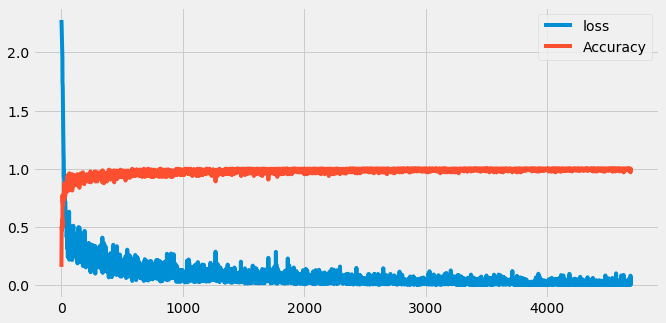

In [47]:
# plot the Train acc and loss
# plt.figure(figsize=(14,14))
pd.DataFrame(data={'loss': loss_, "Accuracy": acc_}).plot(figsize=(10,5))

In [49]:
# testing over the test data

test_loss = 0
test_acc = 0

with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)        
        
        y_pred = model(x.reshape(-1, 784))
        loss = CE_loss(y_pred, y)
        
        test_loss += loss.item()
        test_acc += torch.mean((torch.argmax(y_pred, 1) == y).float()).item()
        batch+=1

In [51]:
print(f"test loss: {test_loss/batch:.4f}, test accuracy: {test_acc/batch:.4f}")

test loss: 0.0729, test accuracy: 0.9812


In [52]:
pred = np.array([])
target = np.array([])

with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)        
        
        y_pred = model(x.reshape(-1, 784))
        loss = CE_loss(y_pred, y)
        
        pred = np.concatenate((pred, torch.argmax(y_pred, 1).cpu().numpy()))
        target = np.concatenate((target, y.cpu().numpy()))        

In [53]:
cm = confusion_matrix(target, pred)

<AxesSubplot:>

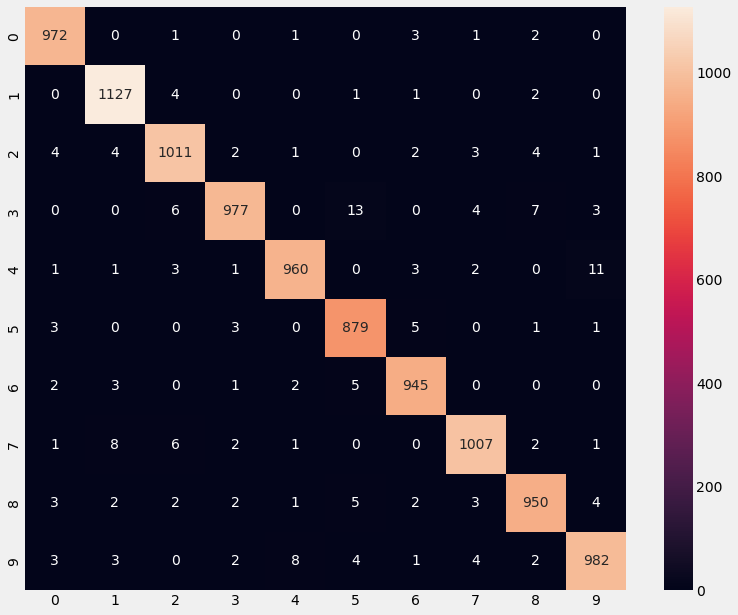

In [54]:
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d')